<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Kriging 1D applied to a row in a asingle image </font>
</div>

- **Fecha**: 2023/06/06
        
- **Objetivos**: Procesamiento de imagen basado en Kriging
- **Descripción** Tutorial for determining how it works

- **Autores**: 
    - Luis Miguel Sánchez Brea
    - Luis Blas Braunschweig Leotte

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [18]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 160
rcParams['lines.markersize']=10
rcParams['image.cmap']='gray'
rcParams['figure.figsize']=(3,3)

%matplotlib widget


# Experimental variogram 

In [19]:

from phyton_kriging import np, plt


from phyton_kriging.variogram_1D import experimental, theoretical, fitting

from phyton_kriging.standard_1D import kriging1D


# Uploading Image

Leemos una imagen cualqueira, se ha elegido una en la que tenemos en cuenta parte del cielo

In [20]:
import PIL.Image as Image
import cv2
import tifffile as tiff

ModuleNotFoundError: No module named 'tifffile'

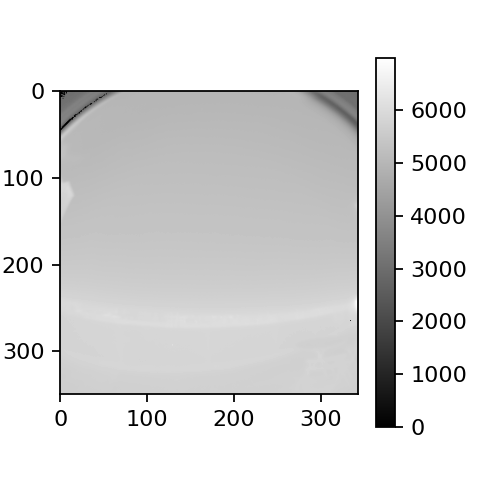

In [28]:
path=r'avion_ir.tiff'
from PIL import Image
im = Image.open('avion_ir.tiff')
#im.show()


imarray = np.array(im)


imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[50:400,639+78+39:639+460]
plt.figure()
plt.imshow(imarray)
ejes.set_clim()
plt.colorbar()
num_y,num_x=np.shape(imarray)

# Variograma en 1D, elección de tipo y parametrización

NO RUNEES ESTA CELDA, TARDA MUCHO, ESTÁ EL RESULTADO GUARDADO DE LO QUE DA.

2023-06-15 15:10:21,433 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.57
2023-06-15 15:10:23,003 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.5727415164150598, best pos: [  1.9986  25.047  304.828 ]
2023-06-15 15:10:25,912 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.24
2023-06-15 15:10:27,536 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.2359441482187568, best pos: [  1.9997  24.5695 305.9991]
2023-06-15 15:10:32,811 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=3.2
2023-06-15 15:10:34,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.19650583

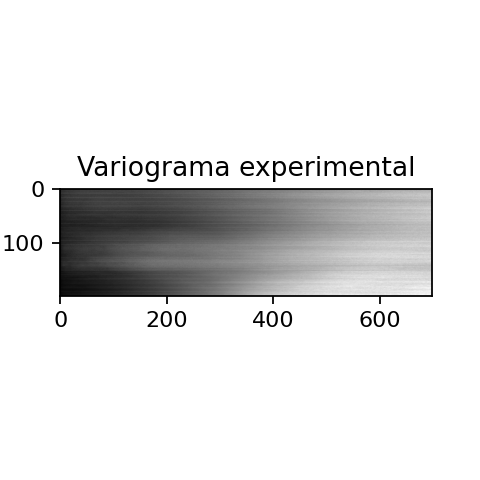

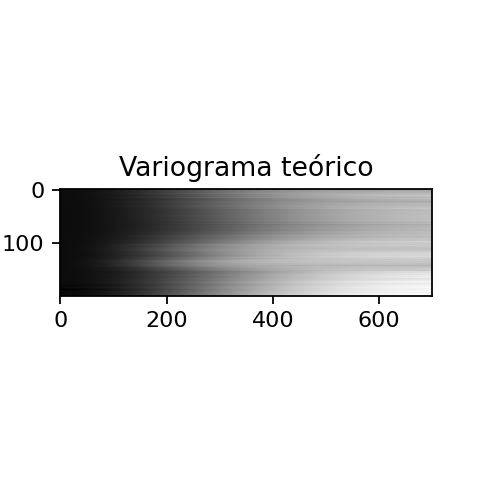

In [55]:
num_samplingx=num_x
num_samplingy=num_y
i_points = np.arange(0, 700)
y= np.arange(0, num_y)
x= np.arange(0, num_x)
var_exp_graf=np.ones([num_y,len(i_points)-1])
var_theo_graf=np.ones([num_y,len(i_points)])



for i in np.arange(0,num_y):
    z=imarray[i,:]
    var_exp=experimental(x,z)
    var_exp.compute(i_points)
    var_exp_graf[i,:]=var_exp.variogram
    

    # aqui debería ir el fitting para hacer un cálculo iterativo

    fitting1 = fitting(type='gauss', var_exp=var_exp,                 
                   min_bound=np.array([1, 0, 0]),
                   max_bound=np.array([2, 50, 400]))
    
    cost, var_final, optimizer = fitting1.execute()



    var_theo = theoretical(h=i_points)
    var_theo.gauss(*fitting1.param_final)
    v_new = var_theo.get(i_points)
    var_theo_graf[i,:]=v_new
    

    




plt.figure()
plt.imshow(var_exp_graf)
plt.title('Variograma experimental')
plt.show()
plt.figure()
plt.imshow(var_theo_graf)
plt.title('Variograma teórico')
plt.show()



# Variograma según espacios de cielo

Primero haremos el variograma del cielo en distintas regiones para verificar que sale aprox bien. Lo primero es hacerlo en una pequeña región para verificar un buen funcionamiento. No se está utilizando el teórico o el fit, porque en principio creo que no hace falta.

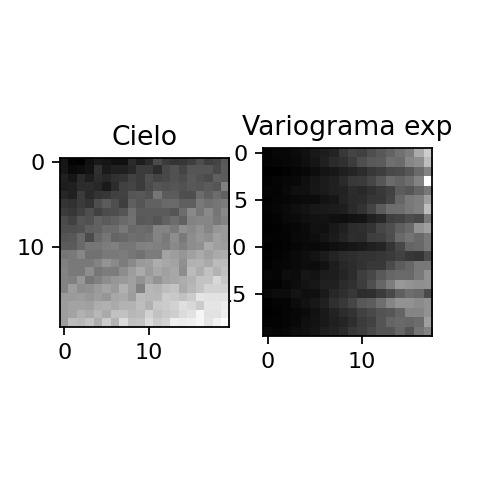

In [7]:
cielo=imarray[20:40,40:60]
num_y,num_x=np.shape(cielo)
num_samplingx=num_x
num_samplingy=num_y
i_points = np.arange(0, 100)
y= np.arange(0, num_y)
x= np.arange(0, num_x)
var_exp_graf=np.ones([num_y,18])

for i in np.arange(0,num_y):
    z=cielo[i,:]
    var_exp=experimental(x,z)
    var_exp.compute(i_points)
    var_exp_graf[i,:]=var_exp.variogram

figure = plt.figure()
subplot2 = figure.add_subplot(1, 2, 2)
subplot2.imshow(var_exp_graf)
subplot2.title.set_text('Variograma exp')

subplot1=figure.add_subplot(1, 2, 1)
subplot1.imshow(cielo)
subplot1.title.set_text("Cielo")
plt.show()



Hago un método iterativo que recorra el cielo:

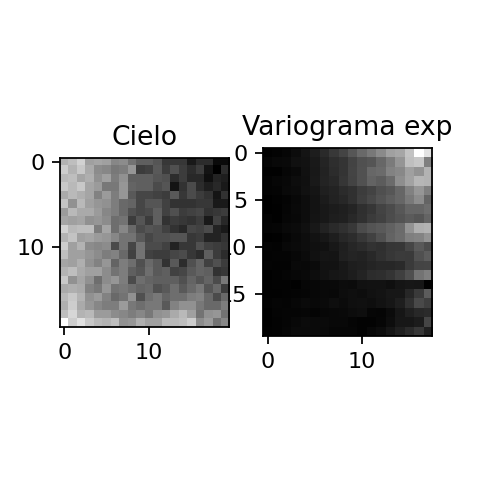

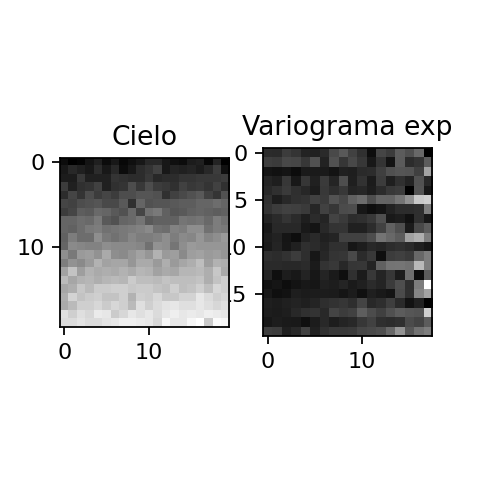

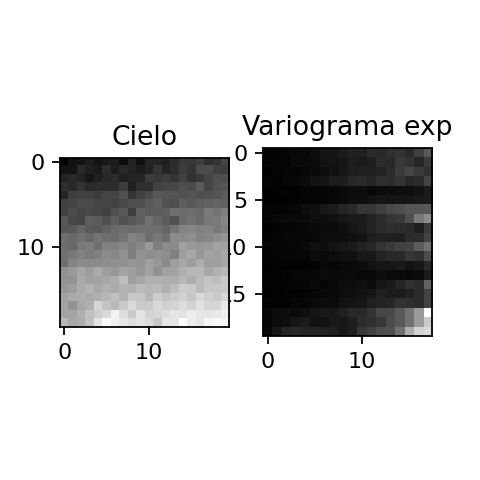

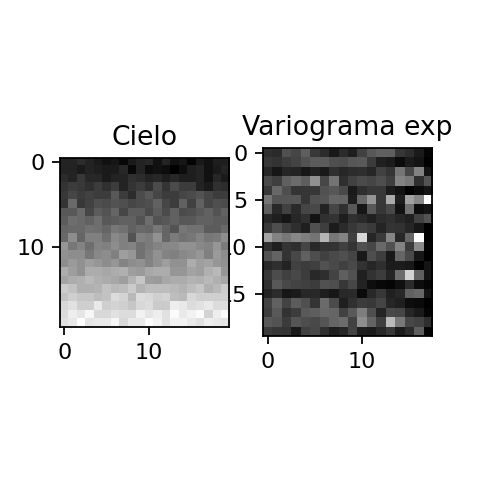

In [8]:

for iii in np.arange(0,150,100):
    for ii in np.arange(20,200,100):
        cielo=imarray[iii:iii+20,ii:ii+20]
        num_y,num_x=np.shape(cielo)
        num_samplingx=num_x
        num_samplingy=num_y
        i_points = np.arange(0, 200)
        y= np.arange(0, num_y)
        x= np.arange(0, num_x)
        var_exp_graf=np.ones([num_y,18])

        for i in np.arange(0,num_y):
            z=cielo[i,:]
            var_exp=experimental(x,z)
            var_exp.compute(i_points)
            var_exp_graf[i,:]=var_exp.variogram

        figure = plt.figure()
        subplot2 = figure.add_subplot(1, 2, 2)
        subplot2.imshow(var_exp_graf)
        subplot2.title.set_text('Variograma exp')
            
        subplot1=figure.add_subplot(1, 2, 1)
        subplot1.imshow(cielo)
        subplot1.title.set_text("Cielo")
        plt.show()
        #input("Presione una tecla para observar otro pedazo de cielo") #Esto es un intento de que te lo muestre poco a poco pero no me ha salido



# Pruebo a hacer el variograma para luz directa (SOL)

Subo una foto con Sol y aplico el mismo algoritmo pero más centrado en el Sol:

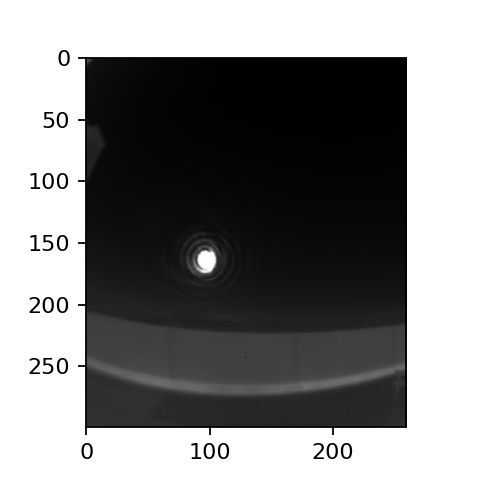

In [6]:
path=r'Sol_ir.tiff'
from PIL import Image
im = Image.open('Sol_ir.tiff')
#im.show()


imarray = np.array(im)


imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[100:400,639+78+39:639+460-83]
plt.figure()
plt.imshow(imarray)
num_y,num_x=np.shape(imarray)

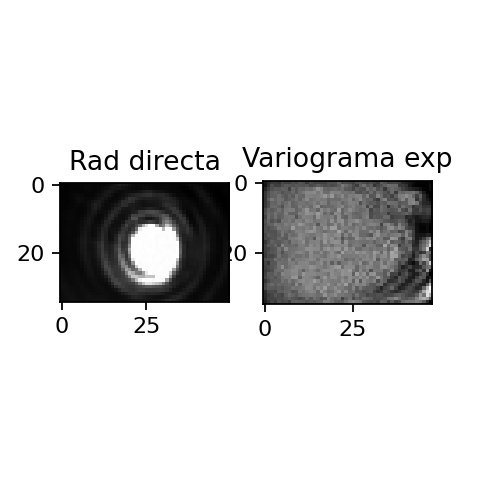

In [10]:
Sol=imarray[145:180,70:120]
num_y,num_x=np.shape(Sol)
num_samplingx=num_x
num_samplingy=num_y
i_points = np.arange(0, 100)
y= np.arange(0, num_y)
x= np.arange(0, num_x)
var_exp_graf=np.ones([num_y,48])

for i in np.arange(0,num_y):
    z=Sol[i,:]
    var_exp=experimental(x,z)
    var_exp.compute(i_points)
    var_exp_graf[i,:]=var_exp.variogram

figure = plt.figure()
subplot2 = figure.add_subplot(1, 2, 2)
subplot2.imshow(var_exp_graf)
subplot2.title.set_text('Variograma exp')

subplot1=figure.add_subplot(1, 2, 1)
subplot1.imshow(Sol)
subplot1.title.set_text("Rad directa")
plt.show()



# Variograma del Suelo

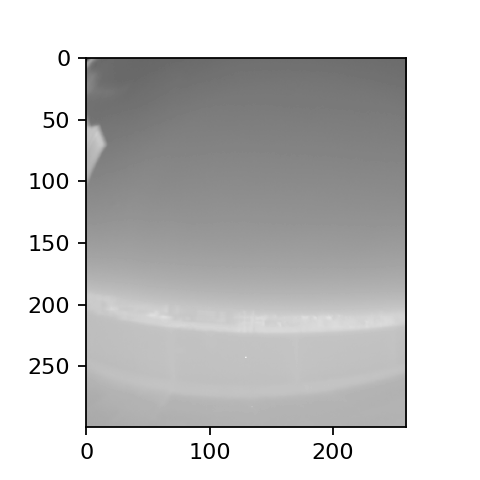

In [11]:
path=r'avion_ir.tiff'
from PIL import Image
im = Image.open('avion_ir.tiff')
#im.show()


imarray = np.array(im)


imarray[imarray>2**14]=imarray[imarray>2**14]-[2**16-2**14]
imarray=imarray[100:400,639+78+39:639+460-83]
plt.figure()
plt.imshow(imarray)
num_y,num_x=np.shape(imarray)

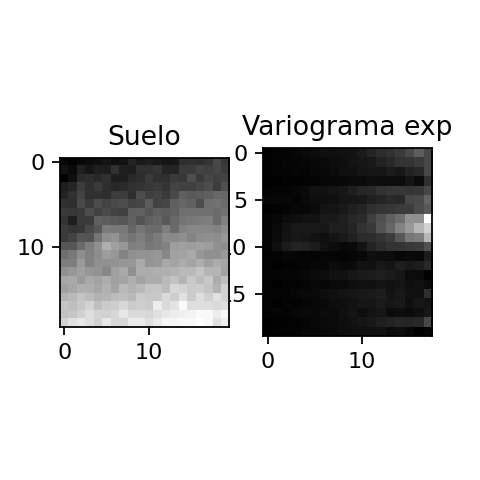

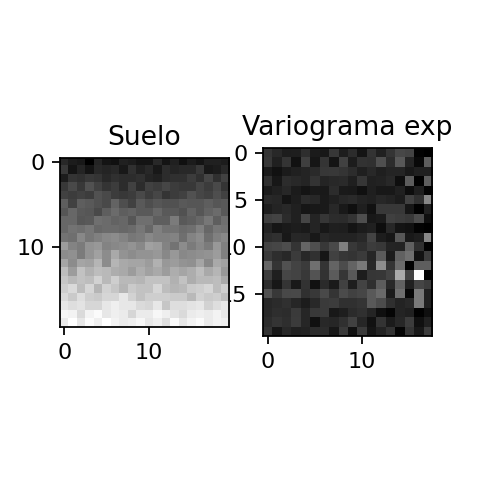

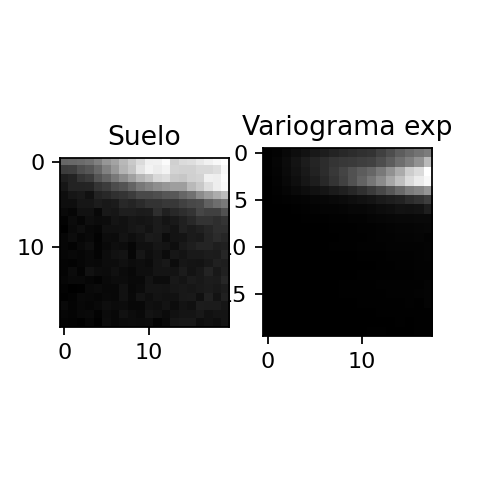

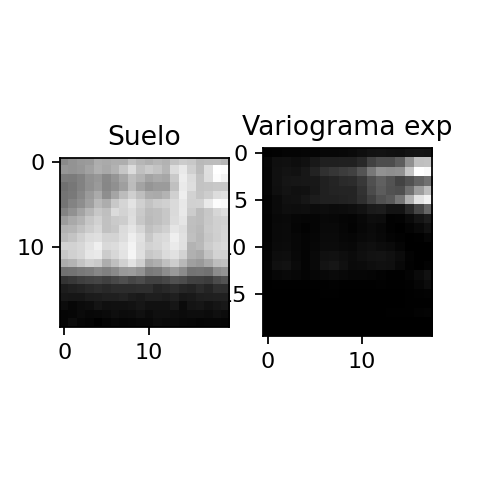

In [13]:

for iii in np.arange(110,290,100):
    for ii in np.arange(20,200,100):
        suelo=imarray[iii:iii+20,ii:ii+20]
        num_y,num_x=np.shape(suelo)
        num_samplingx=num_x
        num_samplingy=num_y
        i_points = np.arange(0, 200)
        y= np.arange(0, num_y)
        x= np.arange(0, num_x)
        var_exp_graf=np.ones([num_y,18])

        for i in np.arange(0,num_y):
            z=suelo[i,:]
            var_exp=experimental(x,z)
            var_exp.compute(i_points)
            var_exp_graf[i,:]=var_exp.variogram

        figure = plt.figure()
        subplot2 = figure.add_subplot(1, 2, 2)
        subplot2.imshow(var_exp_graf)
        subplot2.title.set_text('Variograma exp')
            
        subplot1=figure.add_subplot(1, 2, 1)
        subplot1.imshow(suelo)
        subplot1.title.set_text("Suelo")
        plt.show()

